In [3]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.utils import np_utils
from keras.models import Sequential
from tensorflow.keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.layers import LSTM, InputLayer, Dense
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from keras.utils.vis_utils import plot_model
from tensorflow.keras import layers
from keras.layers import BatchNormalization
import time
import plotly.express as px
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.optimizers import Adam
from tensorflow.python.client import device_lib
import warnings
warnings.filterwarnings("ignore")

In [4]:
x_train = pd.read_csv('x_train.csv')
x_test = pd.read_csv('x_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
y_test_copy = y_test.copy()
y_train_copy = y_train.copy()

In [5]:
x = pd.concat([x_train,x_test], axis = 0)
y = pd.concat([y_train,y_test], axis = 0)

In [6]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

In [7]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

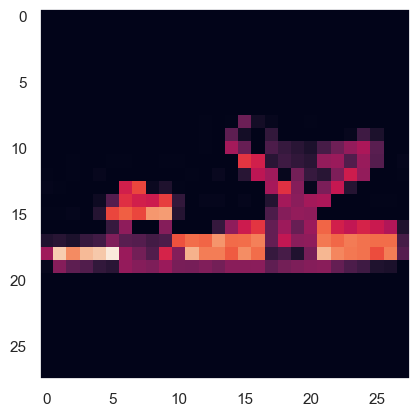

In [116]:
imgtest = x_train[59999].reshape((28,28))
plt.imshow(imgtest)
plt.grid(None)
plt.show()

In [9]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

# Classification with Convolutional Neural Networks

# Q1: Default Network

Classify the data using a Convolutional Neural Network with the following architecture:
• input features x
• convolutional layer with 32, 3x3 filters, stride 1, padding 1x1
• max pooling layer 2,2
• convolutional layer with 32, 3x3 filters, stride 1, padding 1x1
• flatten the output
• output layer: one fully connected layer with five output values
• a softmax layer to transform the outputs into a multi-class probability distribution for classification
• activation functions: internal layers all use ReLU activation
• optimizer : Stochastic Gradient Descent

In [10]:
mod1 = Sequential()
# Convolution layer
mod1.add(Conv2D(32, (3,3), strides=(1, 1), padding='same', activation = 'relu', input_shape = (28,28,1)))
# Pooling Layer
mod1.add(MaxPooling2D(2,2))
mod1.add(Conv2D(32, (3,3), strides=(1, 1), padding='same', activation = 'relu'))
# Flatten layer
mod1.add(Flatten())
# Dense layer
mod1.add(Dense(5, activation='softmax'))

mod1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

mod1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 5)                 31365     
                                                                 
Total params: 40,933
Trainable params: 40,933
Non-trainable params: 0
____________________________________________________

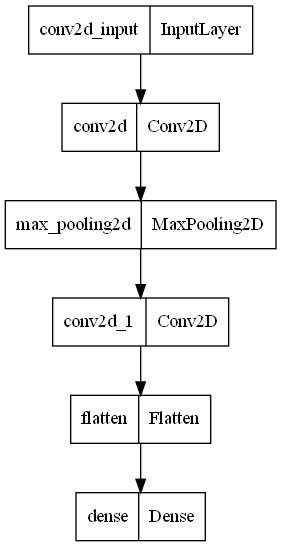

In [122]:
plot_model(mod1)

In [12]:
start_time = time.time()
epo = 32
mod1_fit = mod1.fit(x_train, y_train, validation_split=0.2, batch_size=128,epochs=epo)
end_time = time.time()
mod1_time = end_time-start_time

Epoch 1/32
375/375 [==============================] - 12s 31ms/step - loss: 0.8902 - accuracy: 0.6291 - val_loss: 0.6938 - val_accuracy: 0.7113
Epoch 2/32
375/375 [==============================] - 12s 32ms/step - loss: 0.5873 - accuracy: 0.7755 - val_loss: 0.5836 - val_accuracy: 0.7843
Epoch 3/32
375/375 [==============================] - 12s 32ms/step - loss: 0.5033 - accuracy: 0.8114 - val_loss: 0.4652 - val_accuracy: 0.8258
Epoch 4/32
375/375 [==============================] - 12s 32ms/step - loss: 0.4604 - accuracy: 0.8291 - val_loss: 0.4575 - val_accuracy: 0.8278
Epoch 5/32
375/375 [==============================] - 12s 32ms/step - loss: 0.4340 - accuracy: 0.8391 - val_loss: 0.4192 - val_accuracy: 0.8472
Epoch 6/32
375/375 [==============================] - 13s 33ms/step - loss: 0.4166 - accuracy: 0.8466 - val_loss: 0.4269 - val_accuracy: 0.8428
Epoch 7/32
375/375 [==============================] - 13s 34ms/step - loss: 0.3982 - accuracy: 0.8546 - val_loss: 0.4257 - val_accuracy:

In [120]:
start_time = time.time()
mod1_loss, mod1_accuracy = mod1.evaluate(x_test,y_test)
end_time = time.time()
mod1_time_test = end_time-start_time

print("mod1_Accuracy : ", mod1_accuracy*100,"%")
print("mod1_Loss : ", mod1_loss*100,"%")

mod1_pred = mod1.predict(x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2853 - accuracy: 0.8997
mod1_Accuracy :  89.96999859809875 %
mod1_Loss :  28.526845574378967 %
313/313 [==============================] - 1s 2ms/step


In [123]:
print("The runtime for the training is ", mod1_time, "Seconds")
print()
print("The average time for each epoch is", mod1_time/epo, "Seconds")
print()
print("The runtime for the testing is ", mod1_time_test, "Seconds")

The runtime for the training is  395.83099031448364 Seconds

The average time for each epoch is 12.369718447327614 Seconds

The runtime for the testing is  0.7773752212524414 Seconds


# Q2: Your Own Network

Own Desinged Models

Model 2 - 1

In [17]:
mod2_1 = Sequential()
mod2_1.add(Conv2D(64, (4,4), activation = 'relu', input_shape = (28,28,1)))
mod2_1.add(MaxPooling2D(2,2))
mod2_1.add(Conv2D(64, (4,4), activation = 'relu'))
mod2_1.add(Flatten())
mod2_1.add(Dense(64,activation='relu'))
# Adding Dense layer
mod2_1.add(Dense(5, activation='softmax'))

mod2_1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

mod2_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 25, 25, 64)        1088      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 64)          65600     
                                                                 
 flatten_2 (Flatten)         (None, 5184)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                331840    
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                      

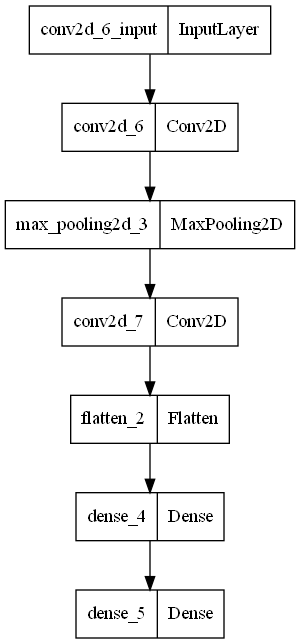

In [18]:
plot_model(mod2_1)

Training the Model

In [19]:
start_time = time.time()
mod2_1_fit = mod2_1.fit(x_train, y_train, validation_split=0.2, batch_size=128,epochs=epo)
end_time = time.time()
mod2_1_time = end_time-start_time

Epoch 1/32
375/375 [==============================] - 19s 49ms/step - loss: 0.4126 - accuracy: 0.8435 - val_loss: 0.3282 - val_accuracy: 0.8797
Epoch 2/32
375/375 [==============================] - 21s 55ms/step - loss: 0.2526 - accuracy: 0.9090 - val_loss: 0.2411 - val_accuracy: 0.9142
Epoch 3/32
375/375 [==============================] - 20s 55ms/step - loss: 0.2089 - accuracy: 0.9243 - val_loss: 0.2184 - val_accuracy: 0.9220
Epoch 4/32
375/375 [==============================] - 21s 55ms/step - loss: 0.1808 - accuracy: 0.9343 - val_loss: 0.1918 - val_accuracy: 0.9311
Epoch 5/32
375/375 [==============================] - 21s 56ms/step - loss: 0.1617 - accuracy: 0.9416 - val_loss: 0.2048 - val_accuracy: 0.9268
Epoch 6/32
375/375 [==============================] - 20s 54ms/step - loss: 0.1454 - accuracy: 0.9463 - val_loss: 0.1980 - val_accuracy: 0.9314
Epoch 7/32
375/375 [==============================] - 20s 53ms/step - loss: 0.1304 - accuracy: 0.9526 - val_loss: 0.1839 - val_accuracy:

Evaluating the model

In [20]:
start_time = time.time()
mod2_1_loss, mod2_1_accuracy = mod2_1.evaluate(x_test, y_test)
end_time = time.time()
mod2_1_time_test = end_time-start_time

print("mod2_1_Accuracy : ", mod2_1_accuracy*100,"%")
print("mod2_1_Loss : ", mod2_1_loss*100,"%")

mod2_1_pred = mod2_1.predict(x_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4382 - accuracy: 0.9368
mod2_1_Accuracy :  93.68000030517578 %
mod2_1_Loss :  43.822452425956726 %
313/313 [==============================] - 1s 4ms/step


The first layer is a 2D convolutional layer with 64 filters and a 4x4 kernel. The activation function used is ReLU (Rectified Linear Unit), which is commonly used in deep learning models for its ability to overcome the vanishing gradient problem. The input shape of the layer is the same as the input image, with dimensions of 28x28x1. The output of this layer is a feature map with dimensions of 25x25x64.

The second layer is a max pooling layer with a pool size of 2x2. Max pooling is used to reduce the spatial dimensions of the feature map while retaining the most important features. The output of this layer is a feature map with dimensions of 12x12x64.

The third layer is another 2D convolutional layer with 64 filters and a 4x4 kernel. The activation function used is also ReLU. The input to this layer is the feature map from the previous layer, with dimensions of 12x12x64. The output of this layer is a feature map with dimensions of 9x9x64.

The fourth layer is a flatten layer that converts the feature map into a one-dimensional vector. This layer is needed to connect the convolutional layers to the fully connected layers. The output of this layer is a vector of length 5184.

The fifth layer is a fully connected layer with 64 neurons and the ReLU activation function. The output of this layer is a vector of length 64.

The sixth and final layer is another fully connected layer with 5 neurons, one for each possible digit class. The activation function used is softmax, which produces a probability distribution over the digit classes. The output of this layer is a vector of length 5.

The model uses stochastic gradient descent (SGD) as the optimizer, which is a popular optimization algorithm for deep learning models. No regularization techniques have been explicitly applied to the model, although regularization can be added if necessary.

In [21]:
print("The runtime for the training is ", mod2_1_time, "Seconds")
print()
print("The average time for each epoch is", mod2_1_time/epo, "Seconds")
print()
print("The runtime for the testing is ", mod2_1_time_test, "Seconds")

The runtime for the training is  655.251341342926 Seconds

The average time for each epoch is 20.47660441696644 Seconds

The runtime for the testing is  1.3305509090423584 Seconds


Model 2 - 2

In [22]:
# Define the model architecture
mod2_2 = Sequential()
mod2_2.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape = (28,28,1)))
mod2_2.add(MaxPooling2D(pool_size=(2, 2)))
mod2_2.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
mod2_2.add(MaxPooling2D(pool_size=(2, 2)))
mod2_2.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
mod2_2.add(MaxPooling2D(pool_size=(2, 2)))
mod2_2.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
mod2_2.add(MaxPooling2D(pool_size=(2, 2)))
mod2_2.add(Flatten())
mod2_2.add(Dense(512, activation='relu'))
mod2_2.add(Dense(5, activation='softmax'))

# Compile the model
mod2_2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

mod2_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 128)       

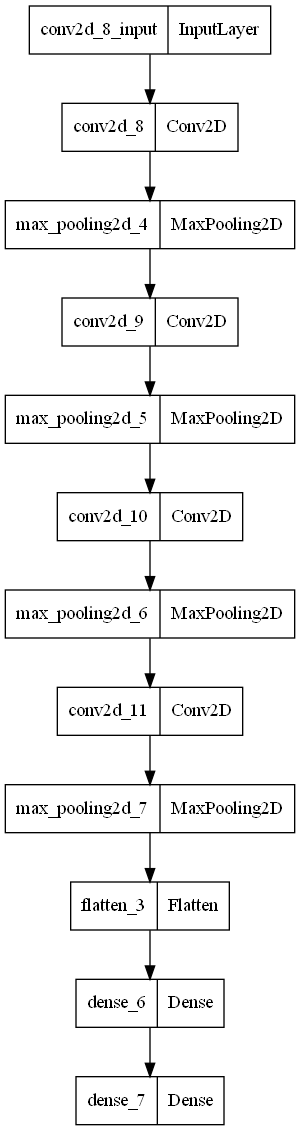

In [23]:
plot_model(mod2_2)

In [24]:
start_time = time.time()
mod2_2_fit = mod2_2.fit(x_train, y_train, validation_split=0.2, batch_size=128,epochs=epo)
end_time = time.time()
mod2_2_time = end_time-start_time

Epoch 1/32
375/375 [==============================] - 24s 63ms/step - loss: 0.5450 - accuracy: 0.7787 - val_loss: 0.3615 - val_accuracy: 0.8641
Epoch 2/32
375/375 [==============================] - 23s 61ms/step - loss: 0.3271 - accuracy: 0.8775 - val_loss: 0.2876 - val_accuracy: 0.8931
Epoch 3/32
375/375 [==============================] - 23s 61ms/step - loss: 0.2932 - accuracy: 0.8920 - val_loss: 0.2801 - val_accuracy: 0.8980
Epoch 4/32
375/375 [==============================] - 23s 62ms/step - loss: 0.2716 - accuracy: 0.9001 - val_loss: 0.2802 - val_accuracy: 0.9008
Epoch 5/32
375/375 [==============================] - 23s 60ms/step - loss: 0.2660 - accuracy: 0.9019 - val_loss: 0.2581 - val_accuracy: 0.9078
Epoch 6/32
375/375 [==============================] - 22s 60ms/step - loss: 0.2524 - accuracy: 0.9072 - val_loss: 0.2608 - val_accuracy: 0.9041
Epoch 7/32
375/375 [==============================] - 22s 60ms/step - loss: 0.2486 - accuracy: 0.9085 - val_loss: 0.2638 - val_accuracy:

Evaluating the Model

In [31]:
start_time = time.time()
mod2_2_loss, mod2_2_accuracy = mod2_2.evaluate(x_test, y_test)
end_time = time.time()
mod2_2_time_test = end_time-start_time

print("mod2_2_Accuracy : ", mod2_2_accuracy*100,"%")
print("mod2_2_Loss : ", mod2_2_loss*100,"%")

mod2_2_pred = mod2_2.predict(x_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2668 - accuracy: 0.9070
mod2_2_Accuracy :  90.70000052452087 %
mod2_2_Loss :  26.681700348854065 %
313/313 [==============================] - 1s 4ms/step


This architecture is a custom CNN with four convolutional layers and four max pooling layers, followed by two fully connected layers. The convolutional layers use increasing numbers of filters, with the first layer having 32 filters, the second layer having 64 filters, the third layer having 128 filters, and the fourth layer having 256 filters. Each convolutional layer is followed by a max pooling layer with a pool size of 2x2. The output of the final max pooling layer is flattened and passed through two fully connected layers with 512 and 5 units, respectively. The activation function for the hidden layers is ReLU, and the output layer uses a softmax activation function to produce a probability distribution over the 5 classes.

We compile the model using the categorical crossentropy loss function, the Adam optimizer with a learning rate of 0.01, and the accuracy metric.

This architecture was designed to gradually increase the depth of the network, allowing it to learn more complex features at each layer. The final two fully connected layers provide a high level of expressiveness for the model to classify the image data.

In [32]:
print("The runtime for the training is ", mod2_2_time, "Seconds")
print()
print("The average time for each epoch is", mod2_2_time/epo, "Seconds")
print()
print("The runtime for the testing is ", mod2_2_time_test, "Seconds")

The runtime for the training is  727.0282537937164 Seconds

The average time for each epoch is 22.71963293105364 Seconds

The runtime for the testing is  1.4400181770324707 Seconds


Model 2 - 3

In [33]:
mod2_3 = Sequential([
    # First convolutional block
    layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third convolutional block
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output
    layers.Flatten(),
    
    # Fully connected layers with dropout regularization
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    # Output layer with softmax activation
    layers.Dense(5, activation='softmax')
])

# Compile the model with SGD optimizer and categorical cross-entropy loss
mod2_3.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# # Print the model summary
mod2_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

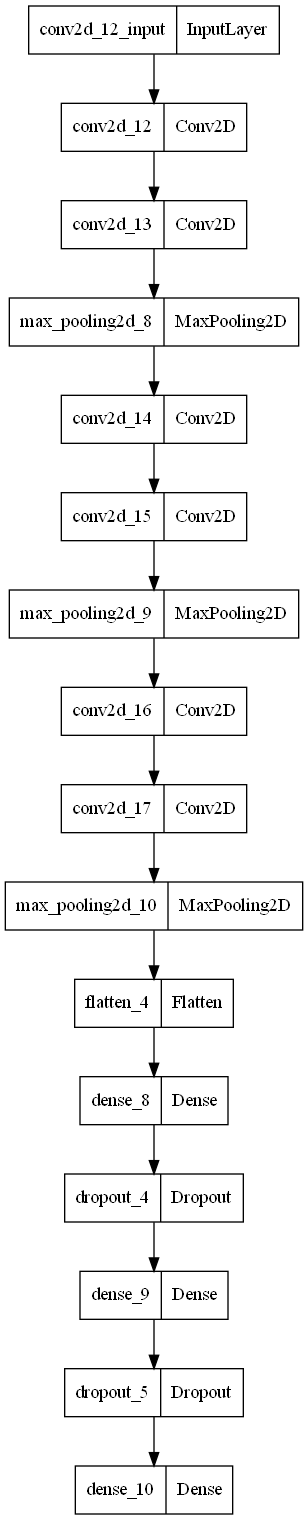

In [34]:
plot_model(mod2_3)

Training the Model

In [35]:
start_time = time.time()
mod2_3_fit = mod2_3.fit(x_train, y_train, validation_split=0.2, batch_size=128,epochs=epo)
end_time = time.time()
mod2_3_time = end_time-start_time

Epoch 1/32
375/375 [==============================] - 82s 217ms/step - loss: 1.4855 - accuracy: 0.3341 - val_loss: 1.0542 - val_accuracy: 0.6122
Epoch 2/32
375/375 [==============================] - 82s 218ms/step - loss: 0.9674 - accuracy: 0.5853 - val_loss: 0.7304 - val_accuracy: 0.6920
Epoch 3/32
375/375 [==============================] - 83s 220ms/step - loss: 0.7594 - accuracy: 0.6941 - val_loss: 0.5686 - val_accuracy: 0.7712
Epoch 4/32
375/375 [==============================] - 82s 218ms/step - loss: 0.6563 - accuracy: 0.7430 - val_loss: 0.5031 - val_accuracy: 0.8012
Epoch 5/32
375/375 [==============================] - 82s 217ms/step - loss: 0.5888 - accuracy: 0.7735 - val_loss: 0.5102 - val_accuracy: 0.7964
Epoch 6/32
375/375 [==============================] - 83s 222ms/step - loss: 0.5356 - accuracy: 0.7968 - val_loss: 0.4174 - val_accuracy: 0.8379
Epoch 7/32
375/375 [==============================] - 82s 218ms/step - loss: 0.4967 - accuracy: 0.8124 - val_loss: 0.3951 - val_ac

Evaluating the Model

In [36]:
start_time = time.time()
mod2_3_loss, mod2_3_accuracy = mod2_3.evaluate(x_test, y_test)
end_time = time.time()
mod2_3_time_test = end_time-start_time

print("mod2_3_Accuracy : ", mod2_3_accuracy*100,"%")
print("mod2_3_Loss : ", mod2_3_loss*100,"%")

mod2_3_pred = mod2_3.predict(x_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.2403 - accuracy: 0.9130
mod2_3_Accuracy :  91.29999876022339 %
mod2_3_Loss :  24.02973175048828 %
313/313 [==============================] - 4s 13ms/step


For this problem, we will propose an architecture that is inspired by the VGG16 network architecture. This architecture is characterized by having several convolutional layers followed by a few fully connected layers. In this case, we have used 3 convolutional blocks and 2 fully connected layers.

Each convolutional block will have two convolutional layers with a 3x3 kernel size and 64 filters followed by a max pooling layer with a 2x2 window. After the convolutional blocks, the output will be flattened and passed through two fully connected layers with 256 and 128 neurons respectively. we have used the ReLU activation function for all layers except the output layer which will use the softmax activation function to produce a probability distribution over the five classes.

To avoid overfitting, we have added dropout regularization after each fully connected layer with a rate of 0.5. The optimizer used will be Adam with a learning rate of 0.001. we have used categorical cross-entropy as the loss function.

In [37]:
print("The runtime for the training is ", mod2_3_time, "Seconds")
print()
print("The average time for each epoch is", mod2_3_time/epo, "Seconds")
print()
print("The runtime for the testing is ", mod2_3_time_test, "Seconds")

The runtime for the training is  2599.8724575042725 Seconds

The average time for each epoch is 81.24601429700851 Seconds

The runtime for the testing is  4.395643949508667 Seconds


Model 2 - 4

In [38]:
# Define the model architecture
mod2_4 = Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional block
    layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    # Fully connected layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5),

    # Output layer
    layers.Softmax()
])

# Compile the model with Adam optimizer and categorical cross-entropy loss
mod2_4.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# Print the model summary
mod2_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

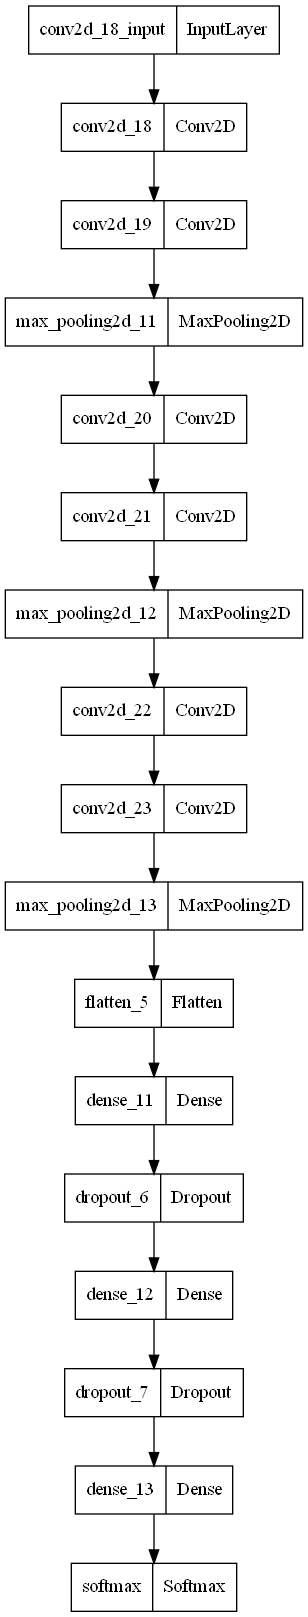

In [132]:
plot_model(mod2_4)

Training the Model

In [40]:
start_time = time.time()
mod2_4_fit = mod2_4.fit(x_train, y_train, validation_split=0.2, batch_size=128,epochs=epo)
end_time = time.time()
mod2_4_time = end_time-start_time

Epoch 1/32
375/375 [==============================] - 56s 149ms/step - loss: 1.5063 - accuracy: 0.3251 - val_loss: 1.1083 - val_accuracy: 0.5886
Epoch 2/32
375/375 [==============================] - 55s 147ms/step - loss: 0.9814 - accuracy: 0.5763 - val_loss: 0.6997 - val_accuracy: 0.7310
Epoch 3/32
375/375 [==============================] - 55s 148ms/step - loss: 0.7700 - accuracy: 0.6814 - val_loss: 0.5802 - val_accuracy: 0.7577
Epoch 4/32
375/375 [==============================] - 55s 147ms/step - loss: 0.6689 - accuracy: 0.7311 - val_loss: 0.5271 - val_accuracy: 0.7847
Epoch 5/32
375/375 [==============================] - 55s 148ms/step - loss: 0.5972 - accuracy: 0.7675 - val_loss: 0.4728 - val_accuracy: 0.8156
Epoch 6/32
375/375 [==============================] - 55s 147ms/step - loss: 0.5465 - accuracy: 0.7908 - val_loss: 0.4209 - val_accuracy: 0.8388
Epoch 7/32
375/375 [==============================] - 55s 148ms/step - loss: 0.5020 - accuracy: 0.8086 - val_loss: 0.3997 - val_ac

Evaluating the Model

In [131]:
start_time = time.time()
mod2_4_loss, mod2_4_accuracy = mod2_4.evaluate(x_test, y_test)
end_time = time.time()
mod2_4_time_test = end_time-start_time

print("mod2_4_Accuracy : ", mod2_4_accuracy*100,"%")
print("mod2_4_Loss : ", mod2_4_loss*100,"%")

mod2_4_pred = mod2_4.predict(x_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2392 - accuracy: 0.9132
mod2_4_Accuracy :  91.32000207901001 %
mod2_4_Loss :  23.920200765132904 %
313/313 [==============================] - 3s 9ms/step


This architecture has three convolutional blocks, each consisting of two convolutional layers followed by max pooling. The output of the final max pooling layer is flattened and passed through two fully connected layers with dropout regularization before the final output layer.

we chose the Adam optimizer because it tends to converge faster than SGD and requires less tuning of hyperparameters. we have also included dropout regularization in the fully connected layers to prevent overfitting.

The model has approximately over 600k million trainable parameters. Here's a diagram to illustrate the architecture:

In [42]:
print("The runtime for the training is ", mod2_4_time, "Seconds")
print()
print("The average time for each epoch is", mod2_4_time/epo, "Seconds")
print()
print("The runtime for the testing is ", mod2_4_time_test, "Seconds")

The runtime for the training is  1772.1955530643463 Seconds

The average time for each epoch is 55.38111103326082 Seconds

The runtime for the testing is  3.0338339805603027 Seconds


Model 2 - 5

In [43]:
# Define the model
mod2_5 = Sequential()
mod2_5.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
mod2_5.add(BatchNormalization())
mod2_5.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
mod2_5.add(BatchNormalization())
mod2_5.add(MaxPooling2D(pool_size=(2, 2)))
mod2_5.add(Dropout(0.25))

mod2_5.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
mod2_5.add(BatchNormalization())
mod2_5.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
mod2_5.add(BatchNormalization())
mod2_5.add(MaxPooling2D(pool_size=(2, 2)))
mod2_5.add(Dropout(0.25))

mod2_5.add(Flatten())

mod2_5.add(Dense(512, activation='relu'))
mod2_5.add(BatchNormalization())
mod2_5.add(Dropout(0.5))

mod2_5.add(Dense(256, activation='relu'))
mod2_5.add(BatchNormalization())
mod2_5.add(Dropout(0.5))

mod2_5.add(Dense(5, activation='softmax'))

# Compile the model
mod2_5.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
mod2_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                      

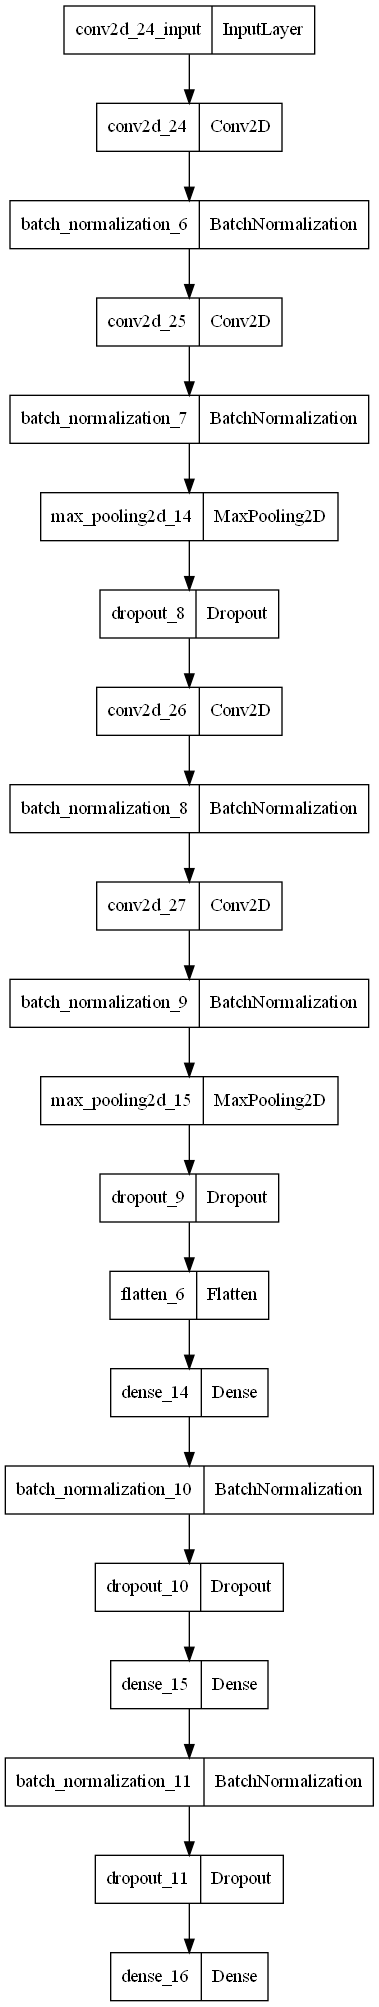

In [44]:
plot_model(mod2_5)

Training the Model

In [45]:
start_time = time.time()
mod2_5_fit = mod2_5.fit(x_train, y_train, validation_split=0.2, batch_size=128,epochs=epo)
end_time = time.time()
mod2_5_time = end_time-start_time

Epoch 1/32
375/375 [==============================] - 64s 169ms/step - loss: 0.4659 - accuracy: 0.8353 - val_loss: 1.3530 - val_accuracy: 0.5585
Epoch 2/32
375/375 [==============================] - 62s 166ms/step - loss: 0.2608 - accuracy: 0.9062 - val_loss: 0.1941 - val_accuracy: 0.9284
Epoch 3/32
375/375 [==============================] - 62s 167ms/step - loss: 0.2183 - accuracy: 0.9219 - val_loss: 0.1829 - val_accuracy: 0.9322
Epoch 4/32
375/375 [==============================] - 62s 166ms/step - loss: 0.1942 - accuracy: 0.9313 - val_loss: 0.1707 - val_accuracy: 0.9375
Epoch 5/32
375/375 [==============================] - 63s 167ms/step - loss: 0.1781 - accuracy: 0.9363 - val_loss: 0.1660 - val_accuracy: 0.9404
Epoch 6/32
375/375 [==============================] - 62s 166ms/step - loss: 0.1673 - accuracy: 0.9404 - val_loss: 0.1833 - val_accuracy: 0.9358
Epoch 7/32
375/375 [==============================] - 62s 167ms/step - loss: 0.1532 - accuracy: 0.9460 - val_loss: 0.1521 - val_ac

Evaluating the Model

In [46]:
start_time = time.time()
mod2_5_loss, mod2_5_accuracy = mod2_5.evaluate(x_test, y_test)
end_time = time.time()
mod2_5_time_test = end_time-start_time

print("mod2_5_Accuracy : ", mod2_5_accuracy*100,"%")
print("mod2_5_Loss : ", mod2_5_loss*100,"%")

mod2_5_pred = mod2_5.predict(x_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.1574 - accuracy: 0.9563
mod2_5_Accuracy :  95.63000202178955 %
mod2_5_Loss :  15.741123259067535 %
313/313 [==============================] - 3s 10ms/step


This model consists of three sets of convolutional layers with increasing depth and decreasing spatial dimensions, followed by a Global Average Pooling layer which helps to reduce the number of parameters in the model. Batch Normalization is added after each Convolutional layer to help with regularization and improve training. The model also uses Dropout to prevent overfitting during training.

The model is compiled using the Adam optimizer with a learning rate of 0.001 and Categorical Crossentropy loss function. The accuracy metric is also calculated during training.

In [47]:
print("The runtime for the training is ", mod2_5_time, "Seconds")
print()
print("The average time for each epoch is", mod2_5_time/epo, "Seconds")
print()
print("The runtime for the testing is ", mod2_5_time_test, "Seconds")

The runtime for the training is  2002.413646221161 Seconds

The average time for each epoch is 62.57542644441128 Seconds

The runtime for the testing is  3.366377353668213 Seconds


# Q3: Results Analysis

In [48]:
runtime_all_total = [mod1_time, mod2_1_time, mod2_2_time, mod2_3_time, mod2_4_time, mod2_5_time]
runtime_all_epoch = [mod1_time/epo, mod2_1_time/epo, mod2_2_time/epo, mod2_3_time/epo, mod2_4_time/epo, mod2_5_time/epo]
runtime_all_test = [mod1_time_test, mod2_1_time_test, mod2_2_time_test, mod2_3_time_test, mod2_4_time_test, mod2_5_time_test]
loss_all = [mod1_loss, mod2_1_loss, mod2_2_loss, mod2_3_loss, mod2_4_loss, mod2_5_loss]
accuracy_all = [mod1_accuracy, mod2_1_accuracy, mod2_2_accuracy, mod2_3_accuracy, mod2_4_accuracy, mod2_5_accuracy]

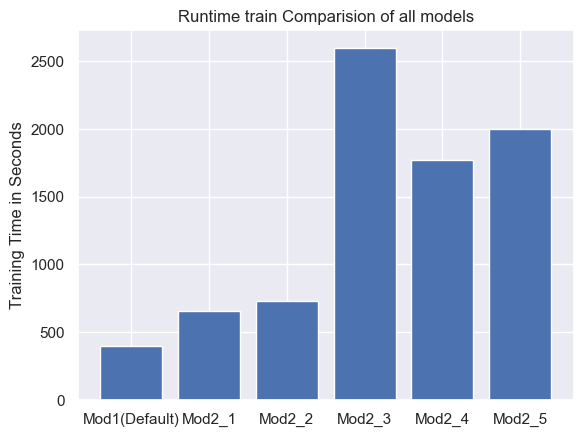

In [117]:
plt.bar(x= range(0,6), height = runtime_all_total, tick_label= ["Mod1(Default)", "Mod2_1", "Mod2_2", "Mod2_3", "Mod2_4", "Mod2_5"])
plt.ylabel("Training Time in Seconds")
plt.title("Runtime train Comparision of all models")
plt.show()

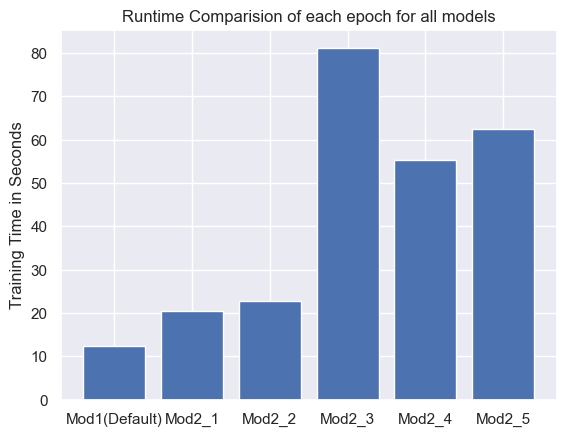

In [118]:
plt.bar(x= range(0,6), height = runtime_all_epoch, tick_label= ["Mod1(Default)", "Mod2_1", "Mod2_2", "Mod2_3", "Mod2_4", "Mod2_5"])
plt.ylabel("Training Time in Seconds")
plt.title("Runtime Comparision of each epoch for all models")
plt.show()

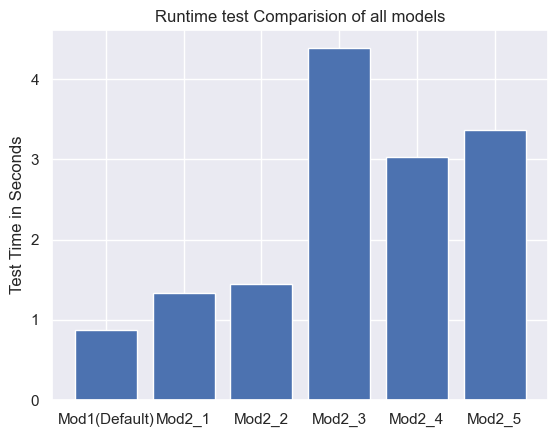

In [104]:
plt.bar(x= range(0,6), height = runtime_all_test, tick_label= ["Mod1(Default)", "Mod2_1", "Mod2_2", "Mod2_3", "Mod2_4", "Mod2_5"])
plt.ylabel("Test Time in Seconds")
plt.title("Runtime test Comparision of all models")
plt.show()

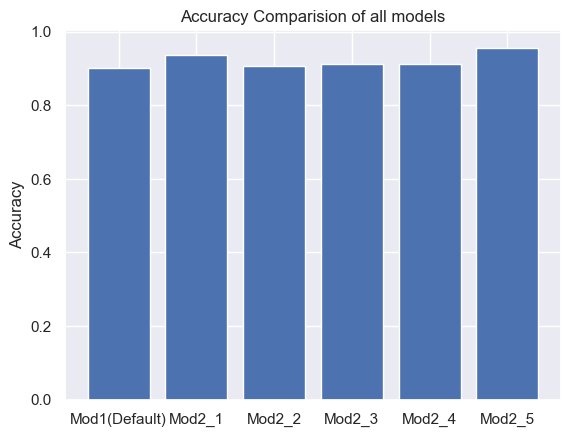

In [105]:
plt.bar(x= range(0,6), height = accuracy_all, tick_label= ["Mod1(Default)", "Mod2_1", "Mod2_2", "Mod2_3", "Mod2_4", "Mod2_5"])
plt.ylabel("Accuracy")
plt.title("Accuracy Comparision of all models")
plt.show()

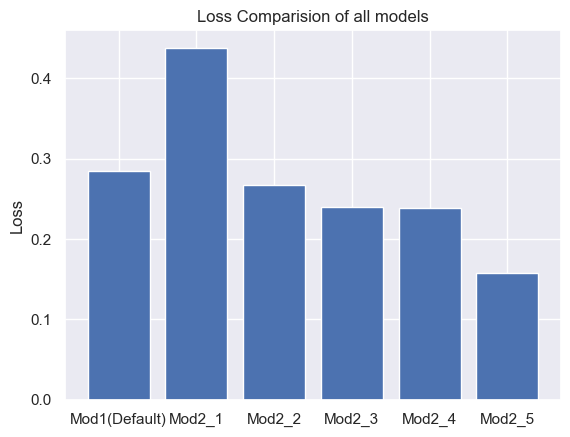

In [138]:
plt.bar(x= range(0,6), height = loss_all, tick_label= ["Mod1(Default)", "Mod2_1", "Mod2_2", "Mod2_3", "Mod2_4", "Mod2_5"])
plt.ylabel("Loss")
plt.title("Loss Comparision of all models")
plt.show()

Comparing the Hyderparameter of all models

In [82]:
print("HyperParameter of Mod1")
for i in mod1.layers:
  print(i.get_config())

HyperParameter of Mod1
{'name': 'conv2d', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 28, 28, 1), 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'max_pooling2d', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}
{'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initia

In [83]:
print("HyperParameter of Mod2_1")
for i in mod2_1.layers:
  print(i.get_config())

HyperParameter of Mod2_1
{'name': 'conv2d_6', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 28, 28, 1), 'filters': 64, 'kernel_size': (4, 4), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'max_pooling2d_3', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}
{'name': 'conv2d_7', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': (4, 4), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kerne

In [84]:
print("HyperParameter of Mod2_2")
for i in mod2_2.layers:
  print(i.get_config())

HyperParameter of Mod2_2
{'name': 'conv2d_8', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 28, 28, 1), 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'max_pooling2d_4', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}
{'name': 'conv2d_9', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_

In [85]:
print("HyperParameter of Mod2_3")
for i in mod2_3.layers:
  print(i.get_config())

HyperParameter of Mod2_3
{'name': 'conv2d_12', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 28, 28, 1), 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'conv2d_13', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': Non

In [86]:
print("HyperParameter of Mod2_4")
for i in mod2_4.layers:
  print(i.get_config())

HyperParameter of Mod2_4
{'name': 'conv2d_18', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 28, 28, 1), 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'conv2d_19', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': Non

In [87]:
print("HyperParameter of Mod2_5")
for i in mod2_5.layers:
  print(i.get_config())

HyperParameter of Mod2_5
{'name': 'conv2d_24', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 28, 28, 1), 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'batch_normalization_6', 'trainable': True, 'dtype': 'float32', 'axis': ListWrapper([3]), 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config'

Plot showing training loss vs. training epoch and also Classification accuracy vs. training epoch for training data and the validation data

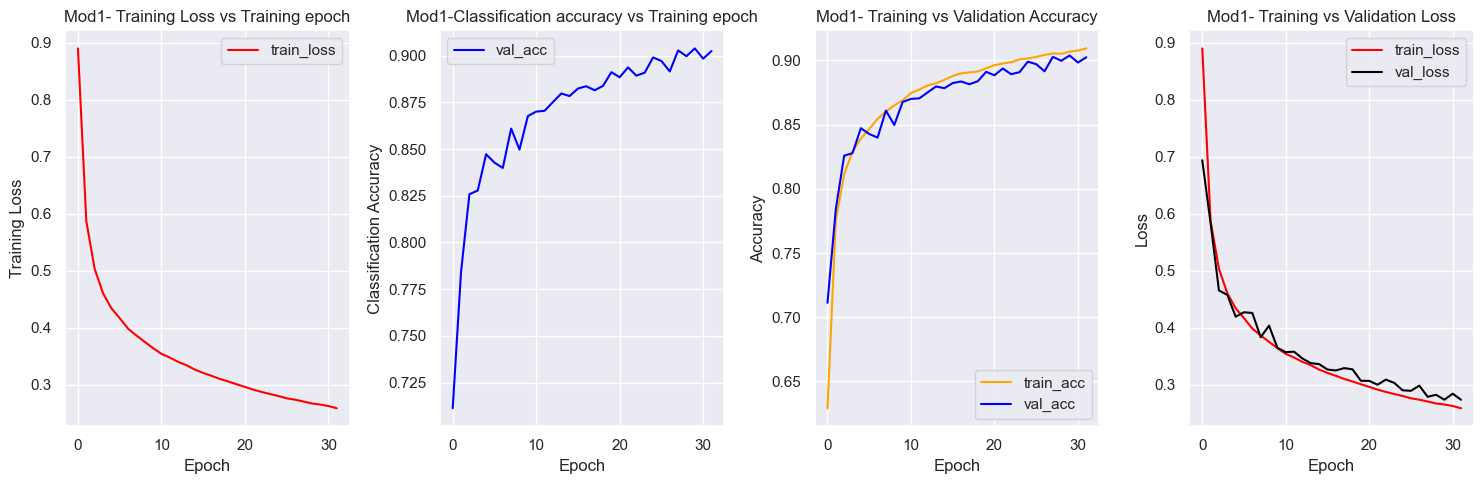

In [133]:
plt.figure(figsize=(15,5))

plt.subplot(141)
plt.title('Mod1- Training Loss vs Training epoch')
plt.plot(mod1_fit.history['loss'], label='train_loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()


plt.subplot(142)
plt.title('Mod1-Classification accuracy vs Training epoch')
plt.plot(mod1_fit.history['val_accuracy'], label='val_acc', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()

plt.subplot(143)
plt.title('Mod1- Training vs Validation Accuracy')
plt.plot(mod1_fit.history['accuracy'], label='train_acc', color='orange')
plt.plot(mod1_fit.history['val_accuracy'], label='val_acc', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(144)
plt.title('Mod1- Training vs Validation Loss')
plt.plot(mod1_fit.history['loss'], label='train_loss', color='red')
plt.plot(mod1_fit.history['val_loss'], label='val_loss', color='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

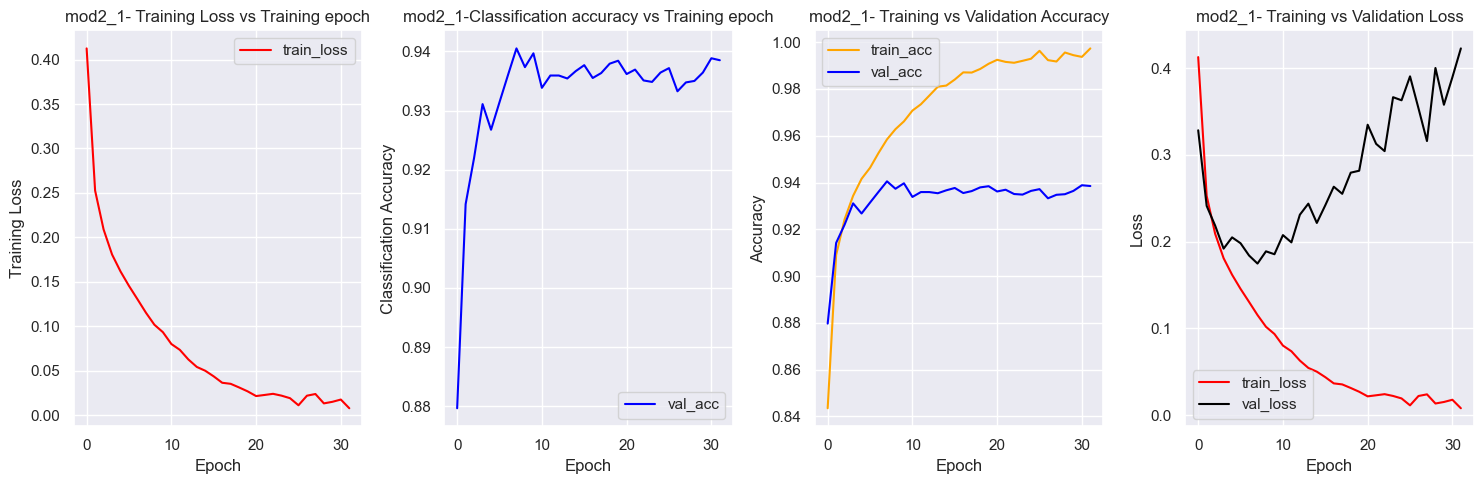

In [119]:
plt.figure(figsize=(15,5))

plt.subplot(141)
plt.title('mod2_1- Training Loss vs Training epoch')
plt.plot(mod2_1_fit.history['loss'], label='train_loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()


plt.subplot(142)
plt.title('mod2_1-Classification accuracy vs Training epoch')
plt.plot(mod2_1_fit.history['val_accuracy'], label='val_acc', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()

plt.subplot(143)
plt.title('mod2_1- Training vs Validation Accuracy')
plt.plot(mod2_1_fit.history['accuracy'], label='train_acc', color='orange')
plt.plot(mod2_1_fit.history['val_accuracy'], label='val_acc', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(144)
plt.title('mod2_1- Training vs Validation Loss')
plt.plot(mod2_1_fit.history['loss'], label='train_loss', color='red')
plt.plot(mod2_1_fit.history['val_loss'], label='val_loss', color='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

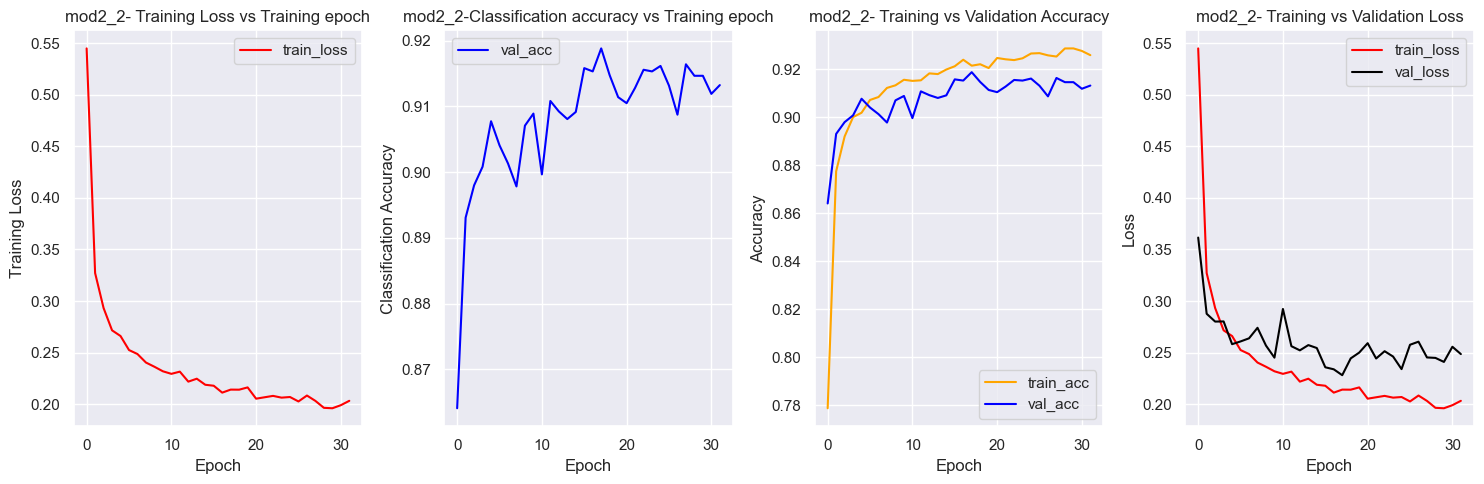

In [134]:
plt.figure(figsize=(15,5))

plt.subplot(141)
plt.title('mod2_2- Training Loss vs Training epoch')
plt.plot(mod2_2_fit.history['loss'], label='train_loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()


plt.subplot(142)
plt.title('mod2_2-Classification accuracy vs Training epoch')
plt.plot(mod2_2_fit.history['val_accuracy'], label='val_acc', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()

plt.subplot(143)
plt.title('mod2_2- Training vs Validation Accuracy')
plt.plot(mod2_2_fit.history['accuracy'], label='train_acc', color='orange')
plt.plot(mod2_2_fit.history['val_accuracy'], label='val_acc', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(144)
plt.title('mod2_2- Training vs Validation Loss')
plt.plot(mod2_2_fit.history['loss'], label='train_loss', color='red')
plt.plot(mod2_2_fit.history['val_loss'], label='val_loss', color='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

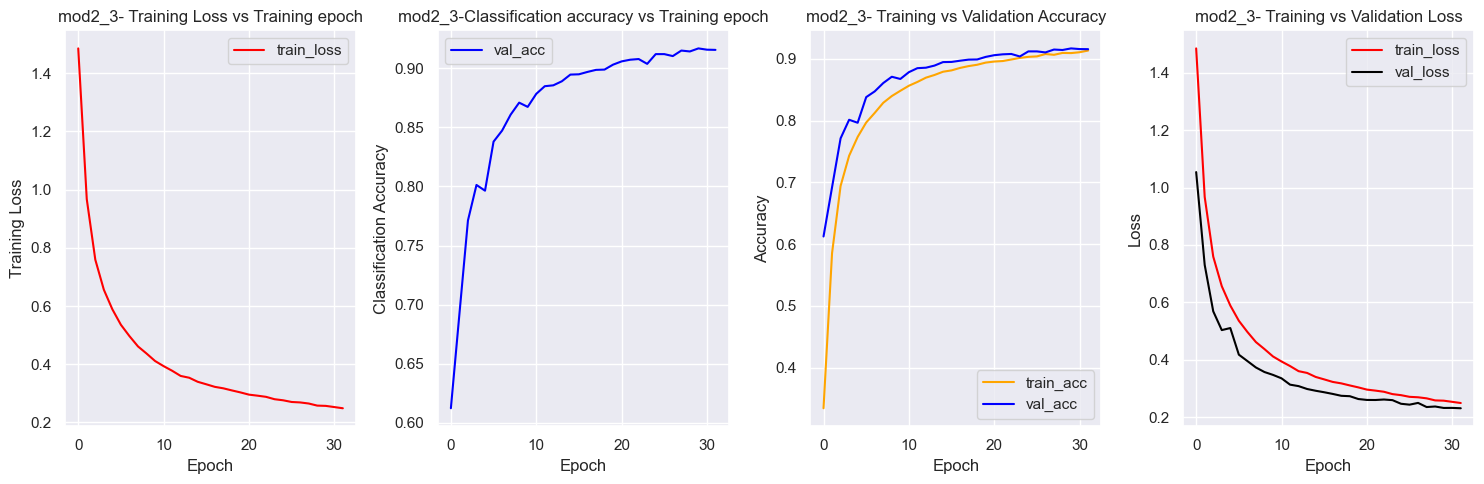

In [135]:
plt.figure(figsize=(15,5))

plt.subplot(141)
plt.title('mod2_3- Training Loss vs Training epoch')
plt.plot(mod2_3_fit.history['loss'], label='train_loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()


plt.subplot(142)
plt.title('mod2_3-Classification accuracy vs Training epoch')
plt.plot(mod2_3_fit.history['val_accuracy'], label='val_acc', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()

plt.subplot(143)
plt.title('mod2_3- Training vs Validation Accuracy')
plt.plot(mod2_3_fit.history['accuracy'], label='train_acc', color='orange')
plt.plot(mod2_3_fit.history['val_accuracy'], label='val_acc', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(144)
plt.title('mod2_3- Training vs Validation Loss')
plt.plot(mod2_3_fit.history['loss'], label='train_loss', color='red')
plt.plot(mod2_3_fit.history['val_loss'], label='val_loss', color='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

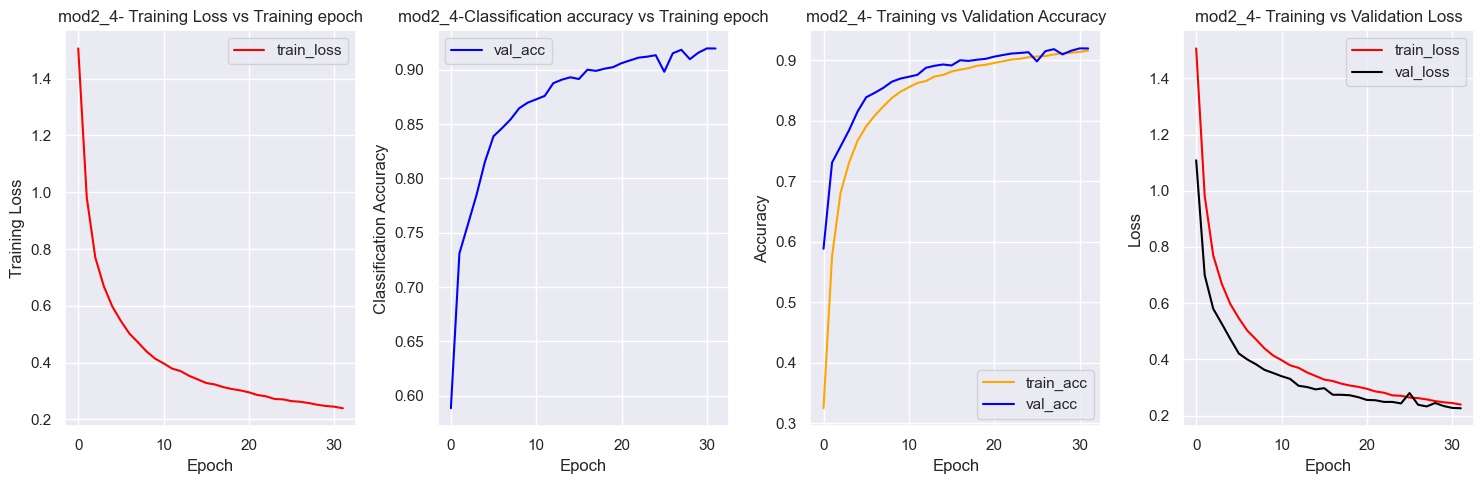

In [136]:
plt.figure(figsize=(15,5))

plt.subplot(141)
plt.title('mod2_4- Training Loss vs Training epoch')
plt.plot(mod2_4_fit.history['loss'], label='train_loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()


plt.subplot(142)
plt.title('mod2_4-Classification accuracy vs Training epoch')
plt.plot(mod2_4_fit.history['val_accuracy'], label='val_acc', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()

plt.subplot(143)
plt.title('mod2_4- Training vs Validation Accuracy')
plt.plot(mod2_4_fit.history['accuracy'], label='train_acc', color='orange')
plt.plot(mod2_4_fit.history['val_accuracy'], label='val_acc', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(144)
plt.title('mod2_4- Training vs Validation Loss')
plt.plot(mod2_4_fit.history['loss'], label='train_loss', color='red')
plt.plot(mod2_4_fit.history['val_loss'], label='val_loss', color='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

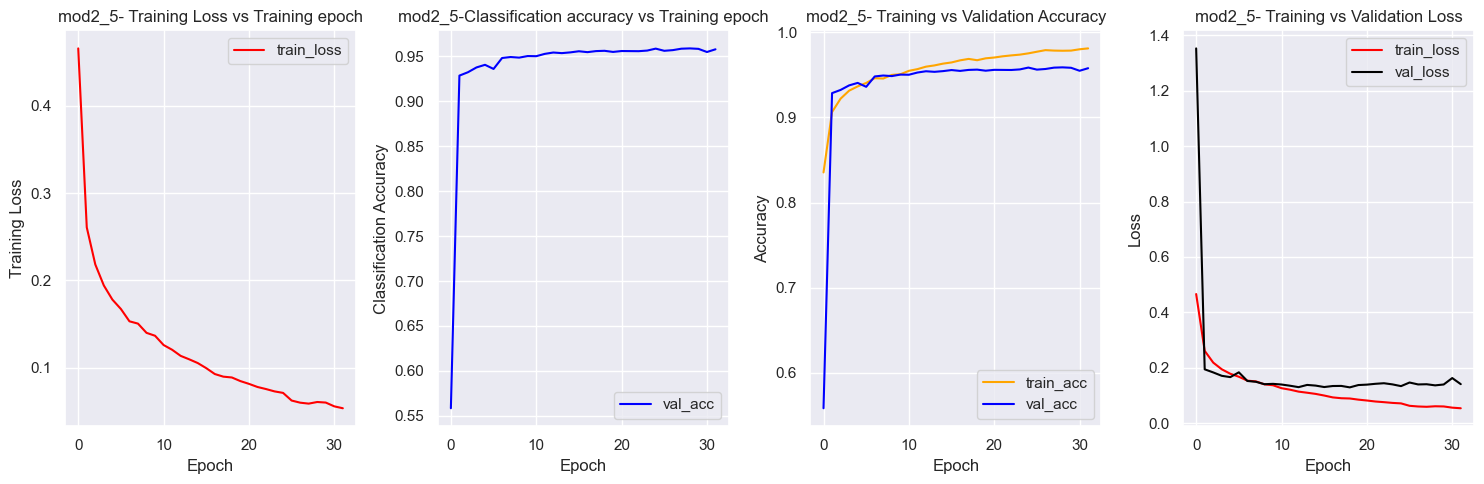

In [137]:
plt.figure(figsize=(15,5))

plt.subplot(141)
plt.title('mod2_5- Training Loss vs Training epoch')
plt.plot(mod2_5_fit.history['loss'], label='train_loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()


plt.subplot(142)
plt.title('mod2_5-Classification accuracy vs Training epoch')
plt.plot(mod2_5_fit.history['val_accuracy'], label='val_acc', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()

plt.subplot(143)
plt.title('mod2_5- Training vs Validation Accuracy')
plt.plot(mod2_5_fit.history['accuracy'], label='train_acc', color='orange')
plt.plot(mod2_5_fit.history['val_accuracy'], label='val_acc', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(144)
plt.title('mod2_5- Training vs Validation Loss')
plt.plot(mod2_5_fit.history['loss'], label='train_loss', color='red')
plt.plot(mod2_5_fit.history['val_loss'], label='val_loss', color='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

Additional plots or tables

Confusion Matrix of all the Models

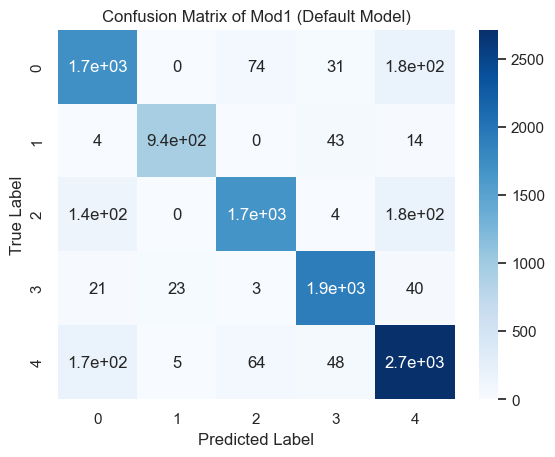

In [110]:
mod1_pred_pd = pd.DataFrame(np.round(mod1_pred))
idx = mod1_pred_pd.idxmax(axis=1)

cm = confusion_matrix(y_test_copy, pd.DataFrame(idx))
# Plot confusion matrix
hm = sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Mod1 (Default Model)')
plt.show()

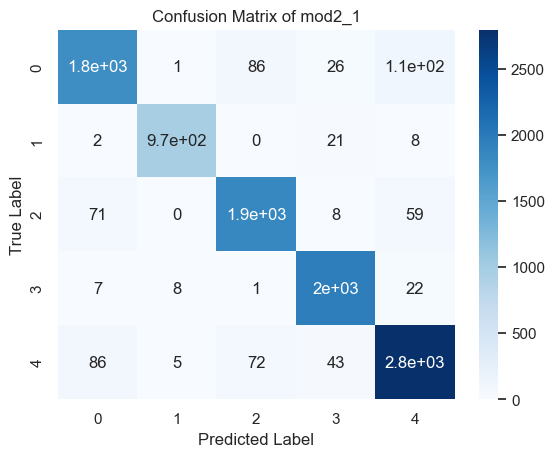

In [111]:
mod2_1_pred_pd = pd.DataFrame(np.round(mod2_1_pred))
idx = mod2_1_pred_pd.idxmax(axis=1)

cm = confusion_matrix(y_test_copy, pd.DataFrame(idx))
# Plot confusion matrix
sns.set(context="notebook")
hm = sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of mod2_1')
plt.show()

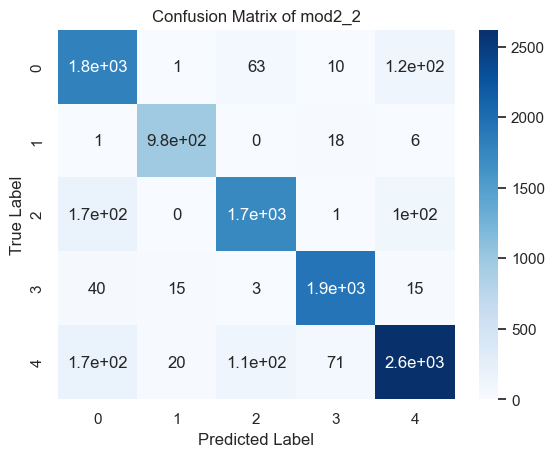

In [112]:
mod2_2_pred_pd = pd.DataFrame(np.round(mod2_2_pred))
idx = mod2_2_pred_pd.idxmax(axis=1)

cm = confusion_matrix(y_test_copy, pd.DataFrame(idx))
# Plot confusion matrix
hm = sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of mod2_2')
plt.show()

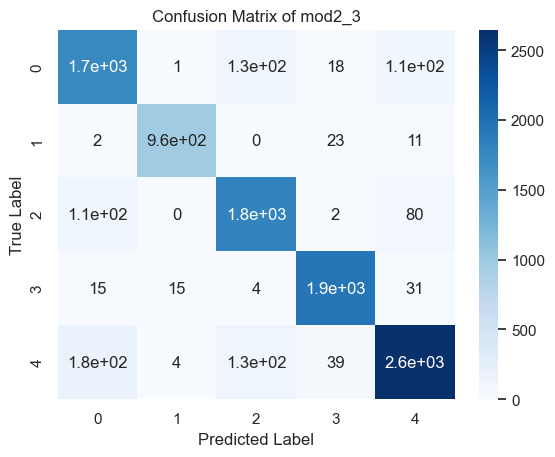

In [113]:
mod2_3_pred_pd = pd.DataFrame(np.round(mod2_3_pred))
idx = mod2_3_pred_pd.idxmax(axis=1)

cm = confusion_matrix(y_test_copy, pd.DataFrame(idx))
# Plot confusion matrix
hm = sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of mod2_3')
plt.show()

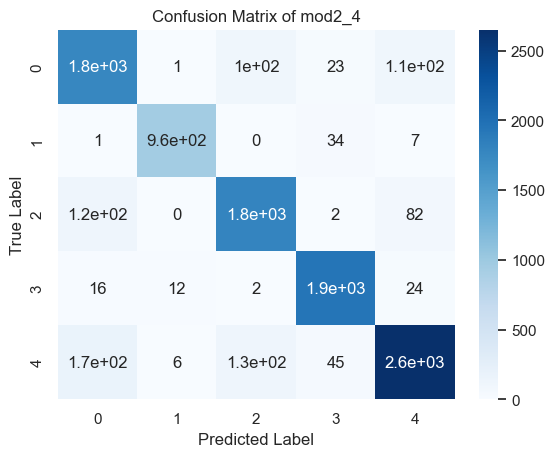

In [114]:
mod2_4_pred_pd = pd.DataFrame(np.round(mod2_4_pred))
idx = mod2_4_pred_pd.idxmax(axis=1)

cm = confusion_matrix(y_test_copy, pd.DataFrame(idx))
# Plot confusion matrix
hm = sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of mod2_4')
plt.show()

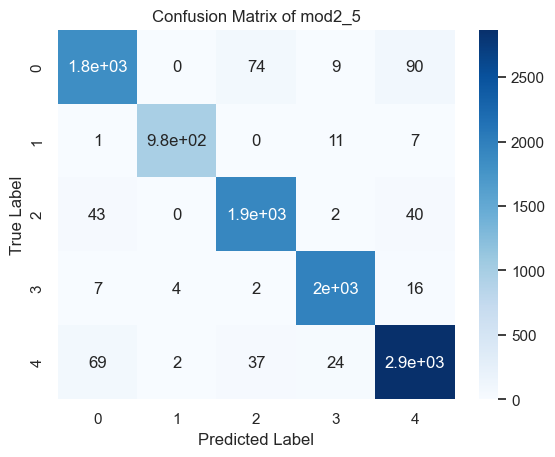

In [115]:
mod2_5_pred_pd = pd.DataFrame(np.round(mod2_5_pred))
idx = mod2_5_pred_pd.idxmax(axis=1)

cm = confusion_matrix(y_test_copy, pd.DataFrame(idx))
# Plot confusion matrix
hm = sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of mod2_5')
plt.show()

# Q4: Using Your Own Encoding

From the own designed models, we chose the Model 2 - 5 as the model to perform the encoding of the test data, cause it has the relatively highest accuracy then other models

In [62]:
# Choose the intermediate layer for encoding
intermediate_layer_model = Model(inputs=mod2_5.input, outputs=mod2_5.layers[-2].output)

In [63]:
encoding = intermediate_layer_model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


Encoded Data

In [64]:
encoding

array([[-0.5439828 , -0.647288  , -0.7046365 , ...,  1.8992411 ,
        -0.4606598 , -0.49217963],
       [ 1.7263181 , -0.647288  , -0.7046365 , ...,  1.4203808 ,
         1.9188347 ,  1.5571122 ],
       [ 1.8890765 , -0.647288  , -0.7046365 , ...,  0.4187072 ,
         2.5979958 , -0.49217963],
       ...,
       [-0.20954514, -0.19367081,  2.133164  , ..., -0.5351504 ,
        -0.4606598 , -0.49217963],
       [ 2.5011117 , -0.647288  , -0.7046365 , ...,  0.8417672 ,
         2.7906046 , -0.24835368],
       [ 0.4516598 ,  0.72619146,  0.79612523, ..., -0.5351504 ,
         0.6971478 , -0.49217963]], dtype=float32)

In [65]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoding)

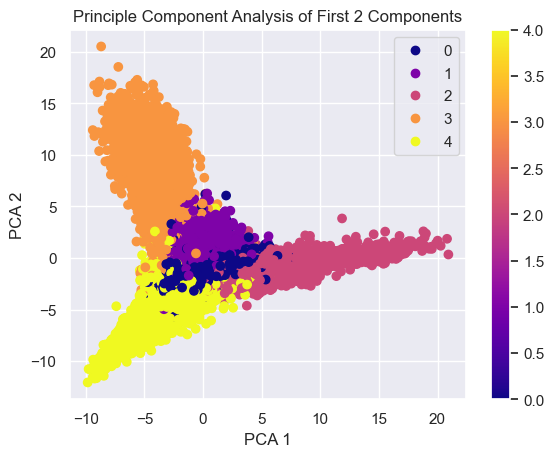

In [66]:
q = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_test_copy['0'], cmap = "plasma")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Principle Component Analysis of First 2 Components")
plt.legend(*q.legend_elements())
plt.colorbar()
plt.show()

In [67]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans_result = kmeans.fit_predict(encoding)

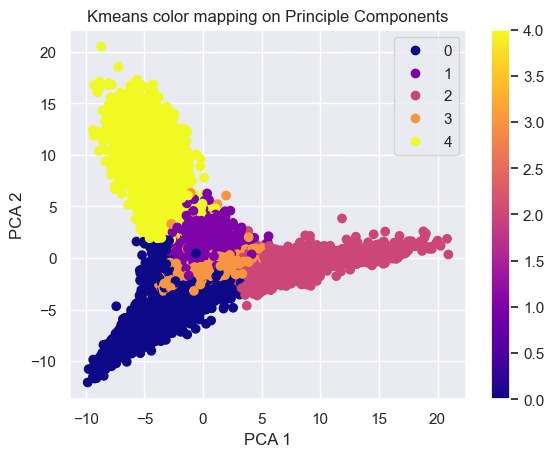

In [68]:
q = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_result, cmap = "plasma")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Kmeans color mapping on Principle Components")
plt.legend(*q.legend_elements())
plt.colorbar()
plt.show()

In [69]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=9)
dbscan_result = dbscan.fit_predict(encoding)

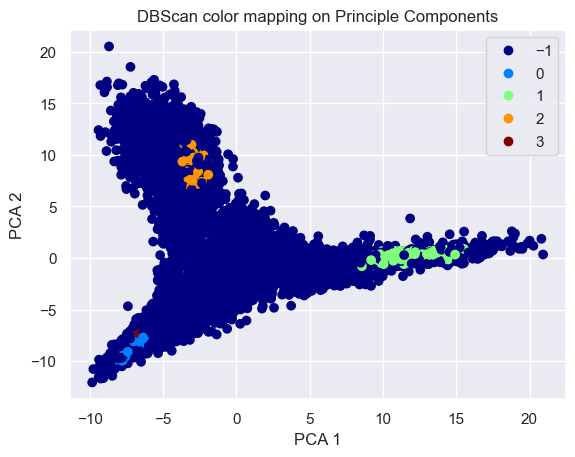

In [70]:
q =plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_result, cmap = "jet")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("DBScan color mapping on Principle Components")
plt.legend(*q.legend_elements(num=4))
plt.show()

In [71]:
# Perform t-SNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(encoding)

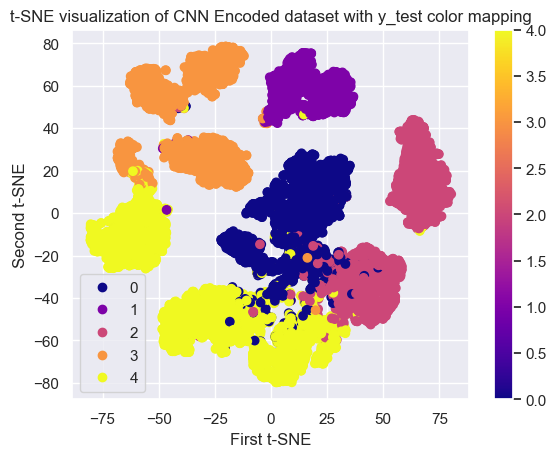

In [72]:
q = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c = y_test_copy['0'], cmap = "plasma")
plt.xlabel("First t-SNE")
plt.ylabel("Second t-SNE")
plt.title("t-SNE visualization of CNN Encoded dataset with y_test color mapping")
plt.legend(*q.legend_elements())
plt.colorbar()
plt.show()

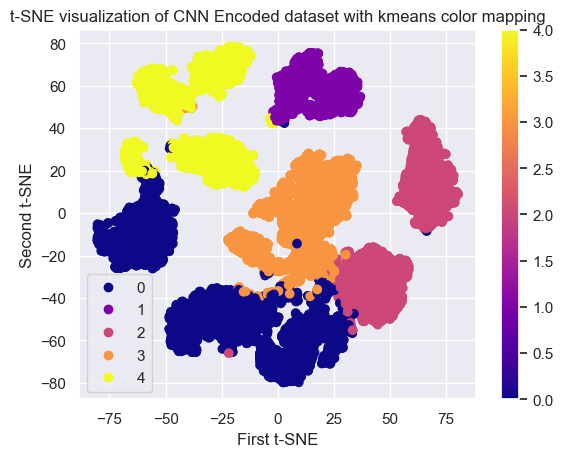

In [73]:
q = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c = kmeans_result, cmap = "plasma")
plt.xlabel("First t-SNE")
plt.ylabel("Second t-SNE")
plt.title("t-SNE visualization of CNN Encoded dataset with kmeans color mapping")
plt.legend(*q.legend_elements())
plt.colorbar()
plt.show()

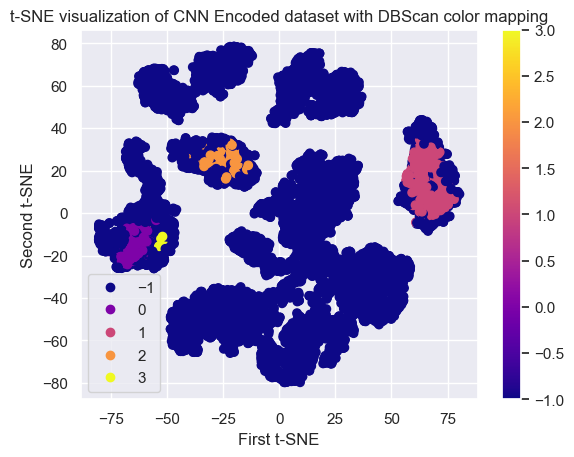

In [74]:
q = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c = dbscan_result, cmap = "plasma")
plt.xlabel("First t-SNE")
plt.ylabel("Second t-SNE")
plt.title("t-SNE visualization of CNN Encoded dataset with DBScan color mapping")
plt.legend(*q.legend_elements(num=4))
plt.colorbar()
plt.show()

Based on the results of clustering and t-SNE guessing what are the labels for the
given dataset

In [75]:
y_test_np = y_test_copy.to_numpy()
label_0 = x_test[np.where(kmeans_result == 0)]
label_1 = x_test[np.where(kmeans_result == 1)]
label_2 = x_test[np.where(kmeans_result == 2)] 
label_3 = x_test[np.where(kmeans_result == 3)]
label_4 = x_test[np.where(kmeans_result == 4)]

In [76]:
label_0_y = y_test_np[np.where(kmeans_result == 0)]
label_1_y = y_test_np[np.where(kmeans_result == 1)]
label_2_y = y_test_np[np.where(kmeans_result == 2)]
label_3_y = y_test_np[np.where(kmeans_result == 3)]
label_4_y = y_test_np[np.where(kmeans_result == 4)]

listing out a random selection of data entries (the original images) for each cluster and their label value

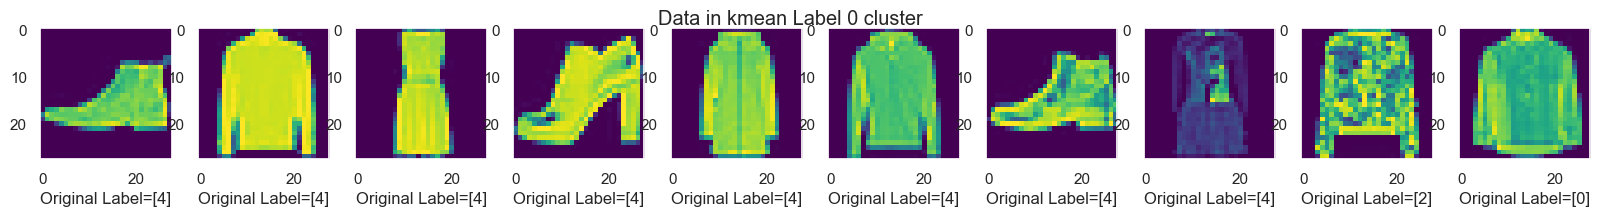

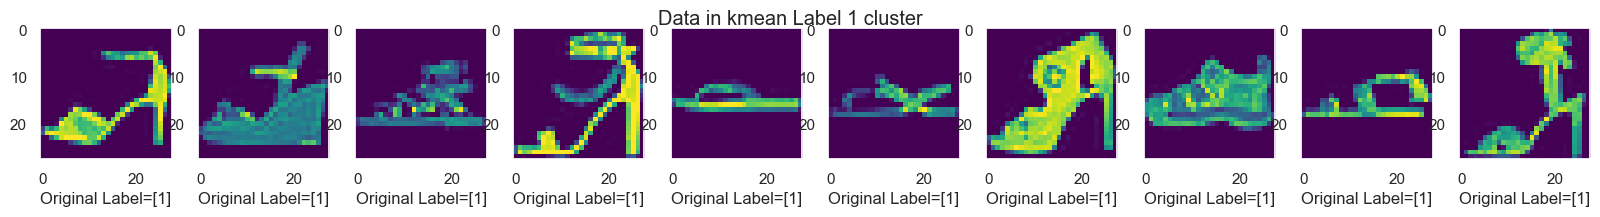

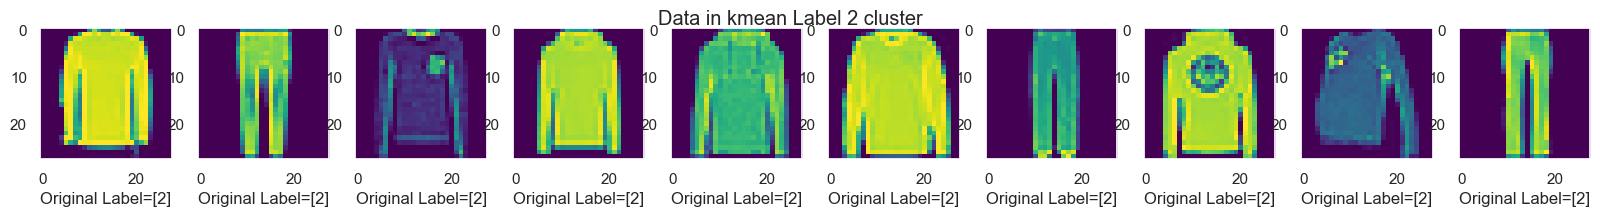

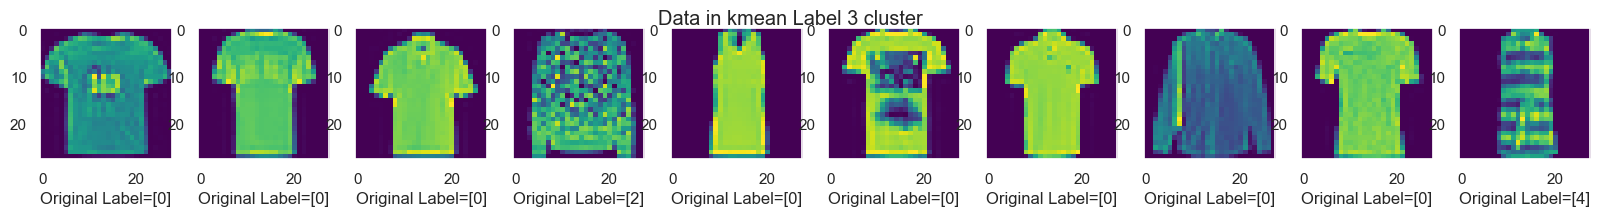

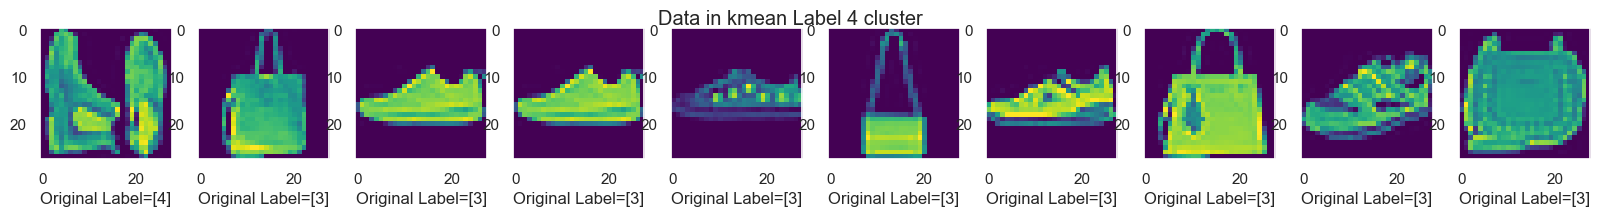

In [97]:
j = 0
num = 10
f, axarr = plt.subplots(1,num, figsize = (20,8))
f.suptitle("Data in kmean Label 0 cluster", y=0.6)
for i in np.random.randint(len(label_0), size = num):
    axarr[j].imshow(label_0[i], cmap = "viridis")
    axarr[j].set_xlabel('Original Label={}'.format(label_0_y[i]))
    axarr[j].grid(None)
    j += 1

j = 0
f, axarr = plt.subplots(1,num, figsize = (20,8))
f.suptitle("Data in kmean Label 1 cluster", y=0.6)
for i in np.random.randint(len(label_1), size = num):
    axarr[j].imshow(label_1[i], cmap = "viridis")
    axarr[j].set_xlabel('Original Label={}'.format(label_1_y[i]))
    axarr[j].grid(None)
    j += 1

j = 0
f, axarr = plt.subplots(1,num, figsize = (20,8))
f.suptitle("Data in kmean Label 2 cluster", y=0.6)
for i in np.random.randint(len(label_2), size = num):
    axarr[j].imshow(label_2[i], cmap = "viridis")
    axarr[j].set_xlabel('Original Label={}'.format(label_2_y[i]))
    axarr[j].grid(None)
    j += 1

j = 0
f, axarr = plt.subplots(1,num, figsize = (20,8))
f.suptitle("Data in kmean Label 3 cluster", y=0.6)
for i in np.random.randint(len(label_3), size = num):
    axarr[j].imshow(label_3[i], cmap = "viridis")
    axarr[j].set_xlabel('Original Label={}'.format(label_3_y[i]))
    axarr[j].grid(None)
    j += 1

j = 0
f, axarr = plt.subplots(1,num, figsize = (20,8))
f.suptitle("Data in kmean Label 4 cluster", y=0.6)
for i in np.random.randint(len(label_4), size = num):
    axarr[j].imshow(label_4[i], cmap = "viridis")
    axarr[j].set_xlabel('Original Label={}'.format(label_4_y[i]))
    axarr[j].grid(None)
    j += 1

From the Following Random samples form the kmeans clusters, where x-labels say the original label (cluster) in the raw dataset (or) the original value of the y_label.

The cluster 0 of kmeans represents the label 4 of original dataset which comprises of ankle boots and coats

The cluster 1 of kmeans represents the label 1 of original dataset which comprises of Sandals

The cluster 2 of kmeans represents the label 2 of original dataset which comprises of trousers and pullovers

The cluster 3 of kmeans represents the label 0 of original dataset which comprises of T-shirts, shirts, tops

The cluster 4 of kmeans represents the label 3 of original dataset which comprises of bags and sneakers

From the Given data, the original 5 catagories of data are

0 - T-shirt, shirt, tops

1 - sandals 

2 - Trousers and pullovers

3 - bags and sneakers

4 - ankle boots and coats

In [78]:
# Perform t-SNE 3D
tsne_3d = TSNE(n_components=3)
tsne_result_3d = tsne_3d.fit_transform(encoding)

In [140]:
fig = px.scatter_3d(x=tsne_result_3d[:, 0], y=tsne_result_3d[:, 1], z=tsne_result_3d[:, 2], color=y_test_copy['0'], opacity=0.8)
fig.show()